## **Local Fraud Detection: Application on Zen Network Data**

The core of this notebook revolves around analyzing one week's worth of Zen Network data on a local machine. This approach follows our initial validation of the Cloud Architecture using a smaller dataset (credit card data). Due to the limitations of our free AWS account and the substantial size of the data at our disposal, we have opted to conduct this analysis locally.

The notebook unfolds in several key phases:
1. **Environment Setup**: Configuring the necessary software environments, including Java, Spark, and Hadoop, to ensure our system can handle the data processing tasks required for fraud detection.
2. **Data Preparation and Exploration**: Importing the dataset and performing initial exploration and cleaning. This step includes understanding the data structure, handling missing values, and preparing the data for analysis.
3. **Feature Engineering**: Enhancing the dataset with new features that could provide deeper insights into potential fraudulent activities. This involves creating variables that capture total data transfer, discrepancies in data transfer, session behavior, and more.
4. **Data Visualization**: Utilizing visualization techniques to explore the data distributions and correlations, offering a visual understanding of the dataset's characteristics and guiding further analysis.
5. **Anomaly Detection with Clustering**: Applying unsupervised learning techniques, specifically KMeans clustering, to group data and identify anomalies that may indicate fraud. This phase includes evaluating the model's effectiveness and interpreting the results to pinpoint suspicious activities.
6. **Conclusion and Insights**: Drawing conclusions from the analysis and providing recommendations on how to utilize the findings to improve fraud detection and prevention strategies.

By the end of this project, we aim to provide actionable insights and a scalable framework for detecting fraud within zen networks large datasets, empowering the company to safeguard their operations and customers against fraudulent activities.

### Environment Configuration for Fraud Detection

In this initial setup, we're preparing our system to analyze a large dataset for fraud detection by configuring the necessary software environments:

1. **Java Setup**: We specify the Java installation path, essential for running Spark, as it relies on Java.
2. **Spark Setup**: Apache Spark is configured next, setting its path. Spark is crucial for processing large datasets quickly.
3. **Hadoop Setup**: We also configure Hadoop, used by Spark for distributed storage and processing.
4. **Updating System Path**: Finally, we add Spark and Hadoop binaries to the system's PATH, allowing easy execution of Spark and Hadoop commands.

The output messages confirm that each component is correctly set up, ensuring our system is ready for data analysis tasks.

In [1]:
import os

java_home = "C:\\Users\\Pc\\Downloads\\jdk-21_windows-x64_bin\\jdk-21.0.1"
os.environ["JAVA_HOME"] = java_home
print('set java path: done!')

spark_path = "C:\\Users\\Pc\\Downloads\\spark-3.5.0-bin-hadoop3\\spark-3.5.0-bin-hadoop3"
os.environ["SPARK_HOME"] = spark_path
print('set spark path: done!')

hadoop_path = "C:\\Users\\Pc\\Downloads\\spark-3.5.0-bin-hadoop3\\spark-3.5.0-bin-hadoop3"
os.environ["HADOOP_HOME"] = hadoop_path
print('set HADOOP path: done!')

os.environ["PATH"] = os.path.join(hadoop_path, "bin") + os.pathsep + os.path.join(spark_path, "bin") + os.pathsep + os.environ["PATH"]

print('Add Spark binaries to the system path: done!')

print("Java Home:", os.environ["JAVA_HOME"])
print("Spark Home:", os.environ["SPARK_HOME"])
print("Spark Home:", os.environ["HADOOP_HOME"])
print("System Path:", os.environ["PATH"])

set java path: done!
set spark path: done!
set HADOOP path: done!
Add Spark binaries to the system path: done!
Java Home: C:\Users\Pc\Downloads\jdk-21_windows-x64_bin\jdk-21.0.1
Spark Home: C:\Users\Pc\Downloads\spark-3.5.0-bin-hadoop3\spark-3.5.0-bin-hadoop3
Spark Home: C:\Users\Pc\Downloads\spark-3.5.0-bin-hadoop3\spark-3.5.0-bin-hadoop3
System Path: C:\Users\Pc\Downloads\spark-3.5.0-bin-hadoop3\spark-3.5.0-bin-hadoop3\bin;C:\Users\Pc\Downloads\spark-3.5.0-bin-hadoop3\spark-3.5.0-bin-hadoop3\bin;c:\Users\Pc\anaconda3;C:\Users\Pc\anaconda3;C:\Users\Pc\anaconda3\Library\mingw-w64\bin;C:\Users\Pc\anaconda3\Library\usr\bin;C:\Users\Pc\anaconda3\Library\bin;C:\Users\Pc\anaconda3\Scripts;C:\Users\Pc\anaconda3\bin;C:\Users\Pc\anaconda3\condabin;C:\Program Files\Common Files\Oracle\Java\javapath;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program File

### Initializing Spark Session for Data Analysis

In this section, we initialize a Spark session, a critical step for performing data analysis in our fraud detection project. Here's what the code accomplishes:

1. **FindSpark**: We begin by importing `findspark` and initializing it with the Spark path. This utility locates Spark on the system and makes its classes available for use in our project.

2. **SparkSession Creation**: We then proceed to create a `SparkSession`, which is the entry point to using Spark's functionality. The session is configured with various parameters to optimize our environment for data processing:
   - `appName`: Sets the name of the application, in this case, "S2D Project Zen Networks".
   - `spark.master`: Configures Spark to run locally, utilizing all available cores.
   - `spark.hadoop.fs.file.impl`: Ensures Spark uses the local file system for Hadoop configurations.
   - Memory and Core Settings: Specifies the memory and cores for both executors and the driver, ensuring efficient resource utilization. For example, `spark.executor.memory` and `spark.driver.memory` are set to "4g" for memory allocation, and `spark.executor.cores` and `spark.driver.cores` are set to "2" to define the number of cores.
   - `spark.default.parallelism`: Configures the default parallelism level, set to "8" here, which influences the number of tasks run in parallel.

By initializing the Spark session with these configurations, we ensure our system is ready to handle the data processing needs of our fraud detection project efficiently.

In [2]:
import findspark
findspark.init(spark_home=spark_path)

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("S2D Projet Zen Networks") \
    .config("spark.master", "local[*]") \
    .config("spark.hadoop.fs.file.impl", "org.apache.hadoop.fs.LocalFileSystem") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.cores", "2") \
    .config("spark.executor.instances", "2") \
    .config("spark.driver.cores", "2") \
    .config("spark.default.parallelism", "8") \
    .getOrCreate()

In [4]:
!pyspark --version

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.5.0
      /_/
                        
Using Scala version 2.12.18, Java HotSpot(TM) 64-Bit Server VM, 21.0.1
Branch HEAD
Compiled by user ubuntu on 2023-09-09T01:53:20Z
Revision ce5ddad990373636e94071e7cef2f31021add07b
Url https://github.com/apache/spark
Type --help for more information.


In [3]:
Data = spark.read.csv('C:/Users/Pc/Downloads/april-01-07.csv', header=True)

### Displaying Data Overview for Fraud Detection

Here's a brief overview of the columns shown in the output:

- `__timestamp`: The date and time of the data entry, indicating when the session occurred.
- `sessions_nbr`: The number of sessions associated with a specific ICCID.
- `iccid`: A unique identifier for the SIM card used in the session.
- `customer_name`: The name of the customer or company using the SIM card.
- `master_country_name`: The home country of the SIM card.
- `vplmn`: The visited network where the SIM card was used.
- `session_time_avg`: The average duration of sessions.
- `acct_input_octets_avg` and `acct_output_octets_avg`: Average amounts of data sent and received during the sessions, respectively.
- `zero_bytes_sessions`: The number of sessions where no data was transferred.
- `called_station_id`: The identifier of the network access point used.
- `imsi`: Another unique identifier for the SIM card, tied to the user.
- `roaming_partner`: The network partner providing service during roaming.
- `month` and `year`: The time period of the data entry.

This table provides a comprehensive view of each session's characteristics, helping in identifying patterns or anomalies that could suggest fraudulent behavior, such as unusually high data usage, sessions with zero data transfer, or unexpected roaming activity. Analyzing these aspects is crucial for detecting and preventing fraud in telecommunications networks.

In [33]:
Data.show(truncate=False)

+-----------------------+------------+-------------------+--------------------------+-------------------+-----------------------------------------+------------------+---------------------+----------------------+-------------------+---------------------------+---------------+---------------+-----+----+
|__timestamp            |sessions_nbr|iccid              |customer_name             |master_country_name|vplmn                                    |session_time_avg  |acct_input_octets_avg|acct_output_octets_avg|zero_bytes_sessions|called_station_id          |imsi           |roaming_partner|month|year|
+-----------------------+------------+-------------------+--------------------------+-------------------+-----------------------------------------+------------------+---------------------+----------------------+-------------------+---------------------------+---------------+---------------+-----+----+
|2023-04-01 00:00:00.000|2           |8933240100000328336|Solustop                  |Belgiu

### Data Preparation for Fraud Detection Analysis

This section of the notebook involves several steps to prepare the dataset for fraud detection analysis, enhancing its usability for machine learning models. Here's a breakdown of the process:

#### Counting Distinct Values
Firstly, we calculate the number of distinct values for each column in the dataset using the `countDistinct` function. This helps in understanding the diversity and distribution of data, which is crucial for identifying unique patterns and potential anomalies indicative of fraud.

#### Indexing Categorical Columns
Next, we use the `StringIndexer` to convert categorical columns into numerical indices. This step is essential for machine learning models that require numerical input. We apply this transformation to columns such as `iccid`, `imsi`, `customer_name`, `master_country_name`, `vplmn`, `called_station_id`, and `roaming_partner`, creating new columns with the suffix `_index`.

#### Dropping Unnecessary Columns
We then drop columns that are not needed for the analysis, including identifiers and timestamps, to focus on the most relevant features for detecting fraud.

#### Casting Data Types
The data types of several columns are cast to `DoubleType` to ensure consistency and compatibility with machine learning algorithms. This includes converting the number of sessions, session time averages, data transfer amounts, and indices of categorical columns to double precision.

#### Handling Missing Values
We remove any rows with missing values (`na.drop()`), ensuring the dataset is clean and ready for analysis.

#### Descriptive Statistics
Finally, we generate descriptive statistics for the processed dataset using `.describe()`. This provides an overview of the data, including mean, standard deviation, and range for numerical columns, giving insights into the dataset's characteristics.

In [34]:
from pyspark.sql.functions import countDistinct

# Define a list of column names
columns = Data.columns

# Create a list of countDistinct expressions for each column
distinct_count_exprs = [countDistinct(col).alias(col + "_distinct_count") for col in columns]

# Apply the expressions to the DataFrame using the agg function
distinct_counts = Data.agg(*distinct_count_exprs)

# Show the result
distinct_counts.show(truncate=False)

+--------------------------+---------------------------+--------------------+----------------------------+----------------------------------+--------------------+-------------------------------+------------------------------------+-------------------------------------+----------------------------------+--------------------------------+-------------------+------------------------------+--------------------+-------------------+
|__timestamp_distinct_count|sessions_nbr_distinct_count|iccid_distinct_count|customer_name_distinct_count|master_country_name_distinct_count|vplmn_distinct_count|session_time_avg_distinct_count|acct_input_octets_avg_distinct_count|acct_output_octets_avg_distinct_count|zero_bytes_sessions_distinct_count|called_station_id_distinct_count|imsi_distinct_count|roaming_partner_distinct_count|month_distinct_count|year_distinct_count|
+--------------------------+---------------------------+--------------------+----------------------------+----------------------------------

In [10]:
Data.printSchema()

root
 |-- __timestamp: string (nullable = true)
 |-- sessions_nbr: string (nullable = true)
 |-- iccid: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- master_country_name: string (nullable = true)
 |-- vplmn: string (nullable = true)
 |-- session_time_avg: string (nullable = true)
 |-- acct_input_octets_avg: string (nullable = true)
 |-- acct_output_octets_avg: string (nullable = true)
 |-- zero_bytes_sessions: string (nullable = true)
 |-- called_station_id: string (nullable = true)
 |-- imsi: string (nullable = true)
 |-- roaming_partner: string (nullable = true)
 |-- month: string (nullable = true)
 |-- year: string (nullable = true)



In [4]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import col, when

columns = ['iccid', 'imsi', 'customer_name', 'master_country_name', 'vplmn', 'called_station_id', 'roaming_partner']

indexers = [StringIndexer(inputCol=col_name, outputCol=col_name+"_index", handleInvalid='keep').fit(Data) for col_name in columns]

for indexer in indexers:
    Data = indexer.transform(Data)

columns_to_drop = ['iccid', 'imsi','__timestamp','_c0','customer_name', 'master_country_name', 'vplmn', 'called_station_id', 'roaming_partner','month','year']

Data = Data.drop(*columns_to_drop)

In [5]:
from pyspark.sql.types import IntegerType, FloatType, TimestampType, DoubleType

columns_to_cast = [
    ("sessions_nbr", DoubleType()),
    ("session_time_avg", DoubleType()),
    ("acct_input_octets_avg", DoubleType()),
    ("acct_output_octets_avg", DoubleType()),
    ("zero_bytes_sessions", DoubleType()),
    ("iccid_index", DoubleType()),
    ("imsi_index", DoubleType()),
    ("customer_name_index", DoubleType()),
    ("master_country_name_index", DoubleType()),
    ("vplmn_index", DoubleType()),
    ("called_station_id_index", DoubleType()),
    ("roaming_partner_index", DoubleType())
]

for column, data_type in columns_to_cast:
    Data = Data.withColumn(column, col(column).cast(data_type))

Data = Data.na.drop()

Data.show(5)

+------------+------------------+---------------------+----------------------+-------------------+-----------+----------+-------------------+-------------------------+-----------+-----------------------+---------------------+
|sessions_nbr|  session_time_avg|acct_input_octets_avg|acct_output_octets_avg|zero_bytes_sessions|iccid_index|imsi_index|customer_name_index|master_country_name_index|vplmn_index|called_station_id_index|roaming_partner_index|
+------------+------------------+---------------------+----------------------+-------------------+-----------+----------+-------------------+-------------------------+-----------+-----------------------+---------------------+
|         2.0|           43254.0|              14629.0|                9377.0|                0.0|   184225.0|  141308.0|               10.0|                      5.0|       13.0|                    2.0|                  6.0|
|         2.0|           17185.0|               5544.0|                3013.5|                0.

In [38]:
Data.describe().show(truncate=False)

+-------+-----------------+------------------+---------------------+----------------------+-------------------+------------------+------------------+-------------------+-------------------------+------------------+-----------------------+---------------------+
|summary|sessions_nbr     |session_time_avg  |acct_input_octets_avg|acct_output_octets_avg|zero_bytes_sessions|iccid_index       |imsi_index        |customer_name_index|master_country_name_index|vplmn_index       |called_station_id_index|roaming_partner_index|
+-------+-----------------+------------------+---------------------+----------------------+-------------------+------------------+------------------+-------------------+-------------------------+------------------+-----------------------+---------------------+
|count  |6020035          |6020035           |6020035              |6020035               |6020035            |6020035           |6020035           |6020035            |6020035                  |6020035           |602

### Visualizing Data Distributions and Correlations for Fraud Detection

The process is split into two main parts: distribution analysis and correlation analysis.

#### Distribution Analysis
We define a function `distribution_hist` to visualize the distribution of a numerical feature from the dataset. This function:
- Converts the selected Spark DataFrame column into a list.
- Filters out `None` values to ensure data quality.
- Uses Seaborn to create a histogram with a Kernel Density Estimate (KDE) overlay, showing how the data points are distributed across different values of the selected feature.

This visualization helps in understanding the variability and typical values of a feature, which can be crucial for identifying unusual patterns that may indicate fraud.

#### Correlation Analysis
Next, we calculate and visualize the correlation matrix for the dataset. Correlation analysis helps in identifying relationships between different features, which can be important for understanding how different aspects of the data interact with each other, potentially impacting the likelihood of fraudulent activity.
- A `VectorAssembler` is used to combine the dataset columns into a single vector column, preparing it for correlation analysis.
- The `Correlation.corr` function computes the Pearson correlation matrix for the features.
- The correlation matrix is visualized using Matplotlib, with a heatmap indicating the strength and direction of correlations between features.

Highly correlated features can provide insights into redundant information or highlight key relationships that could be leveraged in fraud detection models. The color-coded heatmap offers an intuitive way to spot strong positive or negative correlations, guiding feature selection and preprocessing steps for machine learning.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def distribution_hist(feature, data=Data):
    # Convert Spark DataFrame column to a list
    feature_data = data.select(feature).rdd.flatMap(lambda x: x).collect()

    # Filter out None values from the feature_data
    feature_data = [value for value in feature_data if value is not None]

    # Create a histogram and density plot using Seaborn
    plt.figure(figsize=(15, 4))
    plt.title("Distribution Analysis of a Numerical Feature")

    sns.histplot(feature_data, bins=30, kde=True, color='skyblue', edgecolor='black', stat='density')
    plt.xlabel(feature)
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()


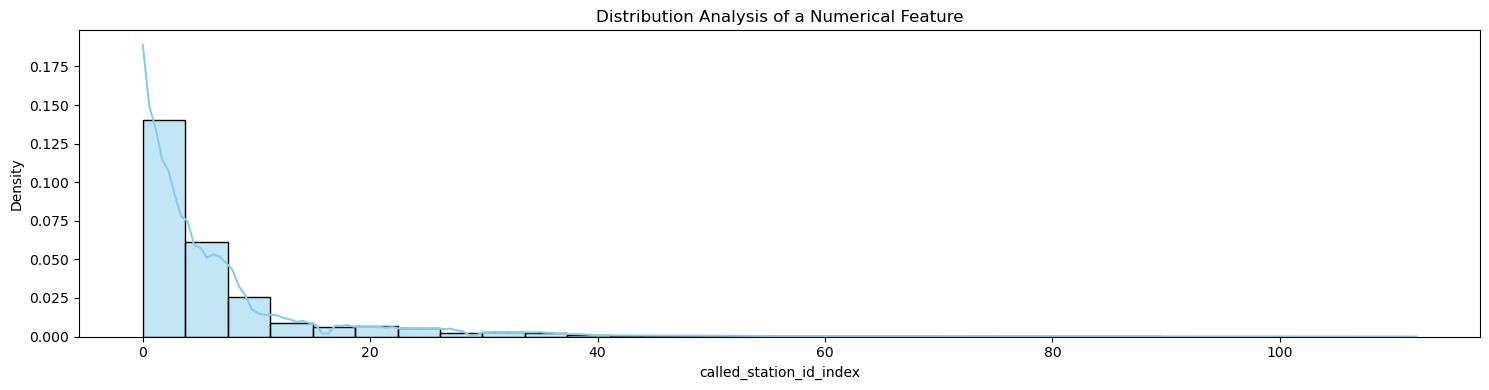

In [17]:
distribution_hist("called_station_id_index", Data)

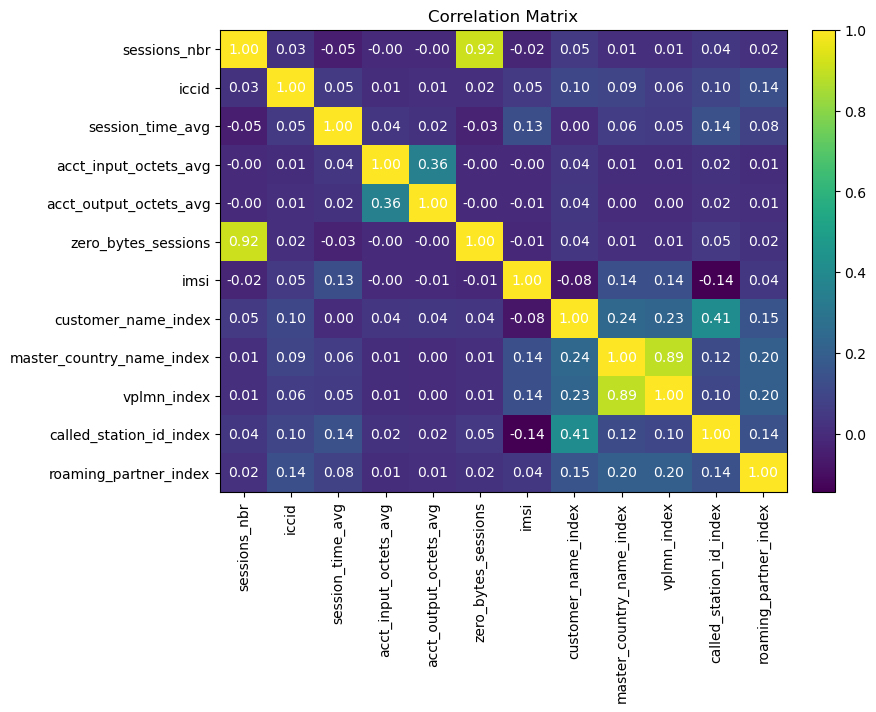

In [18]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

vector_col = "corr_features"

assembler = VectorAssembler(inputCols=Data.columns, outputCol=vector_col, handleInvalid="skip")

Data_vector = assembler.transform(Data).select(vector_col)

matrix = Correlation.corr(Data_vector, vector_col)

corr_matrix = matrix.collect()[0]["pearson({})".format(vector_col)].toArray()

# Plotting the correlation matrix using matplotlib
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(corr_matrix, cmap='viridis', interpolation='none', aspect='auto')

# Add colorbar
plt.colorbar(heatmap, fraction=0.046, pad=0.04)

# Add text annotations
for i in range(len(Data.columns)):
    for j in range(len(Data.columns)):
        text = plt.text(j, i, f'{corr_matrix[i, j]:.2f}', ha='center', va='center', color='w')

# Set axis labels and ticks
plt.xticks(range(len(Data.columns)), Data.columns, rotation=90)
plt.yticks(range(len(Data.columns)), Data.columns)

plt.title("Correlation Matrix")
plt.show()

### Feature Engineering for Enhanced Fraud Detection

We perform feature engineering to create new features that could enhance the detection of fraudulent activities within the dataset. Feature engineering is a crucial step in preparing data for machine learning models. Here’s a summary of the new features we introduced and their significance:

1. **Total Data Transfer**: This feature combines the average incoming (`acct_input_octets_avg`) and outgoing (`acct_output_octets_avg`) data volumes to represent the total data transfer for each session. It provides a comprehensive view of data usage, which can be crucial for identifying sessions with unusually high or low data transfers that might suggest fraud.

2. **Data Transfer Discrepancy**: Calculating the difference between incoming and outgoing data volumes highlights sessions with large discrepancies, which could indicate anomalous behavior such as data leakage or unauthorized access.

3. **Zero Bytes Sessions Ratio**: This feature calculates the proportion of sessions with no data transfer (`zero_bytes_sessions`) relative to the total number of sessions (`sessions_nbr`). A high ratio could signal inactive or potentially compromised SIM cards.

4. **Data Transfer Rate**: By dividing the total data transfer by the session duration (`session_time_avg`), we obtain the data transfer rate. This metric helps in identifying sessions with abnormally fast or slow data rates, which might be indicative of fraudulent activities.

5. **IMSI Frequency**: Counting the frequency of each unique International Mobile Subscriber Identity (`imsi_index`) within the dataset helps in spotting unusual patterns, such as a sudden spike or drop in activity for a specific IMSI, which could suggest fraudulent use or cloning of SIM cards.

After adding these features, we display a portion of the DataFrame to examine the new columns. These engineered features enrich the dataset, providing additional angles for analysis and potentially improving the ability of machine learning models to detect and predict fraudulent activities based on data patterns.

In [6]:
from pyspark.sql.functions import col
from pyspark.sql.window import Window
from pyspark.sql.functions import count

# 1. Total Data Transfer
'''Combine acct_input_octets_avg and acct_output_octets_avg to create a new feature representing the total data transfer for each session.'''
Data = Data.withColumn("total_data_transfer", col("acct_input_octets_avg") + col("acct_output_octets_avg"))

# 2. Data Transfer Discrepancy
'''Calculate the difference between acct_input_octets_avg and acct_output_octets_avg. A significant difference might indicate anomalous behavior'''
Data = Data.withColumn("data_transfer_discrepancy", col("acct_input_octets_avg") - col("acct_output_octets_avg"))

# 3. Zero Bytes Sessions Ratio
'''Create a new feature that represents the ratio of sessions with zero bytes to the total number of sessions'''
Data = Data.withColumn("zero_bytes_sessions_ratio", col("zero_bytes_sessions") / col("sessions_nbr"))

# 4. Data Transfer Rate
'''Divide the total data transfer by the session duration to get the data transfer rate'''
Data = Data.withColumn("data_transfer_rate", col("total_data_transfer") / col("session_time_avg"))

# 5. IMSI Frequency
'''Count the frequency of each unique imsi value. A sudden spike or drop in frequency might indicate anomalous activity'''
Data = Data.withColumn("imsi_frequency", count("imsi_index").over(Window.partitionBy("imsi_index")))

# Show the resulting DataFrame with new features
Data.show(5)


+------------+------------------+---------------------+----------------------+-------------------+-----------+----------+-------------------+-------------------------+-----------+-----------------------+---------------------+-------------------+-------------------------+-------------------------+------------------+--------------+
|sessions_nbr|  session_time_avg|acct_input_octets_avg|acct_output_octets_avg|zero_bytes_sessions|iccid_index|imsi_index|customer_name_index|master_country_name_index|vplmn_index|called_station_id_index|roaming_partner_index|total_data_transfer|data_transfer_discrepancy|zero_bytes_sessions_ratio|data_transfer_rate|imsi_frequency|
+------------+------------------+---------------------+----------------------+-------------------+-----------+----------+-------------------+-------------------------+-----------+-----------------------+---------------------+-------------------+-------------------------+-------------------------+------------------+--------------+
|   

In [40]:
Data.describe().show()

+-------+-----------------+------------------+---------------------+----------------------+-------------------+------------------+------------------+-------------------+-------------------------+-----------------+-----------------------+---------------------+-------------------+-------------------------+-------------------------+------------------+------------------+
|summary|     sessions_nbr|  session_time_avg|acct_input_octets_avg|acct_output_octets_avg|zero_bytes_sessions|       iccid_index|        imsi_index|customer_name_index|master_country_name_index|      vplmn_index|called_station_id_index|roaming_partner_index|total_data_transfer|data_transfer_discrepancy|zero_bytes_sessions_ratio|data_transfer_rate|    imsi_frequency|
+-------+-----------------+------------------+---------------------+----------------------+-------------------+------------------+------------------+-------------------+-------------------------+-----------------+-----------------------+---------------------+-

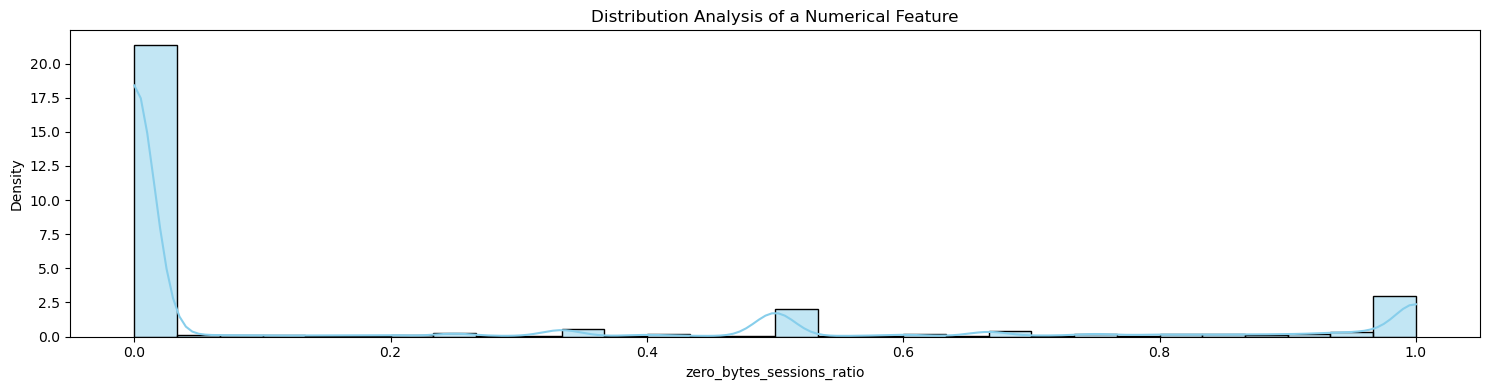

In [21]:
distribution_hist("zero_bytes_sessions_ratio", Data)

### Clustering for Anomaly Detection in Fraud Detection

We implement a clustering-based approach for anomaly detection within our fraud detection project. This method utilizes unsupervised learning to group data into clusters and then identify anomalies based on their distance from cluster centers. Here's an overview of the process and key insights:

#### Pipeline Creation and Model Training
- A `VectorAssembler` combines all features into a single vector column, preparing the data for clustering.
- The `StandardScaler` scales the features to have a mean of 0 and a standard deviation of 1, which is crucial for algorithms like KMeans that are sensitive to the scale of data.
- The `KMeans` model is initialized with a specified number of clusters (four in this case) and fitted to the scaled data through a `Pipeline` that includes the assembler, scaler, and KMeans stages.

#### Silhouette Score Evaluation
- The silhouette score, a measure of how similar an object is to its own cluster compared to other clusters, is calculated. A score of 0.2779 indicates moderate cluster separation.

#### Cluster Interpretation and Anomaly Detection
- After fitting the model and making predictions, the distances between each data point's features and the cluster centers are calculated.
- Anomalies are identified based on their distance from the nearest cluster center. A threshold is set (mean distance plus two standard deviations) to flag data points that are significantly far from any cluster center as anomalies.

#### Results Display and Analysis
- The anomalies are marked in the dataset, and their distribution across different clusters is displayed, offering insights into patterns of potentially fraudulent activity.
- The final step involves counting the number of anomalies within each cluster, helping to understand the prevalence of anomalies across different segments of the data.

This clustering and anomaly detection approach provides a powerful tool for identifying unusual patterns in the data that may indicate fraud. By examining the features and behaviors of data points flagged as anomalies, analysts can gain insights into potential security issues or fraudulent activities, guiding further investigation and preventive measures.

In [8]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.functions import col, when, udf
from pyspark.sql.types import DoubleType

# Combine all features into a single vector column
feature_columns = Data.columns
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features_raw", handleInvalid="skip")

# Scale the features using StandardScaler
scaler = StandardScaler(inputCol="features_raw", outputCol="features", withMean=True, withStd=True)

# Create a KMeans model
num_clusters = 4  # Change the number of clusters
kmeans = KMeans(k=num_clusters, seed=42, featuresCol="features", predictionCol="cluster")

# Create a pipeline
pipeline = Pipeline(stages=[assembler, scaler, kmeans])

# Fit the pipeline to the data
model = pipeline.fit(Data)

# Make predictions
predictions = model.transform(Data)

In [9]:
from pyspark.ml.evaluation import ClusteringEvaluator

# Silhouette Score
evaluator_silhouette = ClusteringEvaluator(predictionCol="cluster", featuresCol="features", metricName="silhouette")
silhouette_score = evaluator_silhouette.evaluate(predictions)
print(f"Silhouette Score: {silhouette_score}")

Silhouette Score: 0.27786944328846575


In [42]:
predictions.show()

+------------+------------------+---------------------+----------------------+-------------------+-----------+----------+-------------------+-------------------------+-----------+-----------------------+---------------------+-------------------+-------------------------+-------------------------+------------------+--------------+--------------------+--------------------+-------+
|sessions_nbr|  session_time_avg|acct_input_octets_avg|acct_output_octets_avg|zero_bytes_sessions|iccid_index|imsi_index|customer_name_index|master_country_name_index|vplmn_index|called_station_id_index|roaming_partner_index|total_data_transfer|data_transfer_discrepancy|zero_bytes_sessions_ratio|data_transfer_rate|imsi_frequency|        features_raw|            features|cluster|
+------------+------------------+---------------------+----------------------+-------------------+-----------+----------+-------------------+-------------------------+-----------+-----------------------+---------------------+-----------

In [11]:
from pyspark.sql import functions as F

# Interpret clusters based on risk levels
cluster_centers = model.stages[-1].clusterCenters()

# Define a UDF to calculate Euclidean distance between vectors
euclidean_distance_udf = udf(lambda x: [float(Vectors.squared_distance(x, center)) for center in cluster_centers], VectorUDT())

# Calculate the Euclidean distance between features and all cluster centers
predictions_dist = predictions.withColumn("distances", euclidean_distance_udf(col("features")))

# Define a UDF to find the minimum distance among all cluster centers
min_distance_udf = udf(lambda distances: float(min(distances)), DoubleType())

# Find the minimum distance for each observation
predictions_dist = predictions_dist.withColumn("min_distance", min_distance_udf(col("distances")))

# Set a threshold for anomaly detection (e.g., 2 times the standard deviation above the mean)
threshold_multiplier = 2.0
mean_distance = predictions_dist.agg(F.mean("min_distance")).collect()[0][0]
stddev_distance = predictions_dist.agg(F.stddev("min_distance")).collect()[0][0]
threshold = mean_distance + (threshold_multiplier * stddev_distance)

# Identify anomalies based on the threshold
predictions_dist = predictions_dist.withColumn("anomaly", when(col("min_distance") > threshold, 1).otherwise(0))

# Display the results
predictions_dist.select("iccid_index", "imsi_index", "cluster", "anomaly").show()

+-----------+----------+-------+-------+
|iccid_index|imsi_index|cluster|anomaly|
+-----------+----------+-------+-------+
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
|      246.0|       0.0|      0|      0|
+-----------+----------+-------+-------+
only showing top

In [44]:
cluster_centers

[array([-0.06226987,  0.09375122, -0.00525788, -0.0040165 , -0.05527507,
         0.34287613,  0.38313344, -0.17828474, -0.21554474, -0.22520433,
        -0.20478103, -0.09100613, -0.00545036, -0.00138399, -0.33093574,
         0.02003144, -0.3819431 ]),
 array([-9.58825188e-02,  6.53250428e+00,  3.45686510e+02,  7.50308586e+01,
        -6.02280166e-02,  7.70911461e-01,  5.91545840e-01,  4.67087286e+00,
         6.89244206e-01,  6.92893758e-01,  2.60662895e+00, -3.38375891e-02,
         2.49998520e+02,  2.68136813e+02, -2.22895130e-01,  4.94432381e+01,
        -7.13890435e-01]),
 array([-9.57683016e-02,  4.63947621e+00,  9.52702275e+01,  3.80219450e+02,
        -6.25563112e-02,  1.47821619e+00,  1.39930775e+00,  4.79472363e+00,
         8.74423821e-02,  1.35096688e-01,  1.77994703e+00,  1.92956149e+00,
         2.74960948e+02, -2.63021254e+02, -4.12956411e-01,  1.29502481e+02,
        -1.20371209e+00]),
 array([ 1.38170107e-01, -2.18761543e-01, -6.99294232e-03, -7.94799219e-03,
       

In [47]:
predictions_dist.select("iccid_index", "imsi_index", "cluster", "anomaly").distinct().show()

+-----------+----------+-------+-------+
|iccid_index|imsi_index|cluster|anomaly|
+-----------+----------+-------+-------+
|    11491.0|    1434.0|      3|      0|
|    16822.0|    2358.0|      3|      0|
|    27799.0|   13809.0|      4|      0|
|   834244.0|   31162.0|      4|      0|
|   138464.0|  123361.0|      0|      0|
|   167732.0|  131877.0|      0|      0|
|   733614.0|  782405.0|      3|      1|
|   747864.0|  775997.0|      0|      1|
|    49477.0|  270500.0|      2|      1|
|   543057.0|  424141.0|      4|      1|
|   785015.0|  872258.0|      1|      1|
|   685814.0|  656654.0|      2|      1|
|   787900.0|  917621.0|      1|      1|
|     4224.0|   10096.0|      3|      0|
|     3951.0|   10382.0|      3|      0|
|     4538.0|   11728.0|      3|      0|
|    37169.0|   12401.0|      3|      0|
|    37805.0|   13037.0|      3|      0|
|     7845.0|   16212.0|      3|      0|
|      341.0|   16993.0|      3|      0|
+-----------+----------+-------+-------+
only showing top

In [12]:
anomaly_counts = predictions_dist.select("iccid_index", "imsi_index", "cluster", "anomaly").distinct().groupBy("cluster", "anomaly").agg(count("*").alias("count"))
anomaly_counts.show()

+-------+-------+------+
|cluster|anomaly| count|
+-------+-------+------+
|      1|      0| 96752|
|      3|      1|    59|
|      1|      1|    96|
|      0|      0|271194|
|      2|      1|    41|
|      0|      1|    68|
|      2|      0|     1|
|      3|      0|721688|
+-------+-------+------+



### **Conclusion**

In conclusion, our analysis of one week's worth of Zen Network data locally using Apache Spark has provided valuable insights into potential fraudulent activities. Despite the constraints of processing on a local machine and the limited dataset size, we successfully applied feature engineering and clustering techniques to identify anomalies indicative of fraud. The obtained silhouette score of 0.2779, while indicative of moderate cluster separation, suggests room for improvement in cluster definition and anomaly detection accuracy.

By expanding our dataset to include a full year's data, we anticipate uncovering more complex relationships and patterns that are not visible in the shorter timeframe. This broader dataset will undoubtedly enhance our model's ability to detect fraudulent activities, leading to better results and more robust fraud detection capabilities.